In [1]:
# we will start by loading energy consumption data 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings


warnings.filterwarnings('ignore')

In [2]:
ec_df = pd.read_csv('../data/trainData/energy consumption.csv')
ec_df

,Site Name,Day,Hour,Total Energy(kWh)
0,site10,1,0,3.91
1,site10,1,1,3.99
2,site10,1,2,3.98
3,site10,1,3,3.99
4,site10,1,4,3.97
...,...,...,...,...
14395,site8,60,19,1.79
14396,site8,60,20,1.86
14397,site8,60,21,1.62
14398,site8,60,22,1.64


In [4]:
# chech for null in ec_df 
ec_df.isnull().sum()
# So found no null in this dataframe 
# Site Name            0
# Day                  0
# Hour                 0
# Total Energy(kWh)    0
# dtype: int64

# Find total average power usage per hour 
average_power_used_per_hour = np.mean(ec_df[['Total Energy(kWh)']])

print(f'The average power used per hour is {average_power_used_per_hour:.2f} kWh')

# The average power used per hour is 5.68 kWh

# After finding the average power used on all place we can find which time of the day need high amount of power 


The average power used per hour is 5.68 kWh


In [5]:
# We will find average find the average of all day from all station 
max_power = np.max(ec_df[['Total Energy(kWh)']])

min_power = np.min(ec_df[['Total Energy(kWh)']])

In [6]:
ec_df[ec_df['Total Energy(kWh)'] == min_power ]

,Site Name,Day,Hour,Total Energy(kWh)
8259,site6,45,3,0.6


In [7]:
sp_df = pd.read_csv('../data/trainData/solar power and weather condition.csv')
sp_df[sp_df['Energy Output(kWh)'] == sp_df['Energy Output(kWh)'].max()]

,Site Name,Day,Hour,Solar Zenith Angle,Clearsky DHI,Clearsky DNI,Clearsky GHI,Relative Humidity,DHI,DNI,GHI,Energy Output(kWh)
6732,site4,41,12,45.61,73.99,890.07,679.76,62.22,112.29,0.0,109.73,26.428


In [8]:
# Merging ec_df and sp_df on the 'Site Name' column
merged_df = pd.merge(ec_df, sp_df, on=['Site Name', 'Day', 'Hour'], how='inner')

print(merged_df)

      Site Name  Day  Hour  Total Energy(kWh)  Solar Zenith Angle  \
0        site10    1     0               3.91              132.74   
1        site10    1     1               3.99              125.46   
2        site10    1     2               3.98              110.62   
3        site10    1     3               3.99              101.20   
4        site10    1     4               3.97               87.93   
...         ...  ...   ...                ...                 ...   
14395     site8   60    19               1.79              136.35   
14396     site8   60    20               1.86              155.55   
14397     site8   60    21               1.62              169.29   
14398     site8   60    22               1.64              178.95   
14399     site8   60    23               1.56              166.79   

       Clearsky DHI  Clearsky DNI  Clearsky GHI  Relative Humidity    DHI  \
0              0.00          0.00          0.00              60.42   0.00   
1              0.

In [9]:
si_df = pd.read_csv('../data/trainData/site information and grid outage.csv')
si_df

,Site Id,diesel power(kW),battery capacity (Ah),rated voltage（V）,battery charge coefficient,battery discharge coefficient,init SOC,DOD,grid power(kW),grid outage plan
0,site1,18.0,300,54,0.35,1.2,0.2,0.15,8,[false false false false false false false fal...
1,site2,17.6,760,54,0.35,1.2,0.2,0.15,14,[false false false false false false false fal...
2,site3,12.8,760,54,0.35,1.2,0.2,0.15,10,[false false false false false false false fal...
3,site4,17.6,760,54,0.35,1.2,0.2,0.15,14,[true true true true true true true true true ...
4,site5,17.6,380,54,0.35,1.2,0.2,0.15,12,[false false false false false true true true ...
5,site6,17.6,760,54,0.35,1.2,0.2,0.15,8,[false false false false false false false fal...
6,site7,18.0,380,54,0.35,1.2,0.2,0.15,8,[false false false false false false false fal...
7,site8,10.8,400,54,0.35,1.2,0.2,0.15,12,[false false false false false false false fal...
8,site9,12.8,400,54,0.35,1.2,0.2,0.15,8,[true true true true true true true true true ...
9,site10,17.6,380,54,0.35,1.2,0.2,0.15,10,[false false false false false true true true ...


In [10]:

# Rename 'Site Id' to 'Site Name' in site_info_df
si_df.rename(columns={'Site Id': 'Site Name'}, inplace=True)
si_df

,Site Name,diesel power(kW),battery capacity (Ah),rated voltage（V）,battery charge coefficient,battery discharge coefficient,init SOC,DOD,grid power(kW),grid outage plan
0,site1,18.0,300,54,0.35,1.2,0.2,0.15,8,[false false false false false false false fal...
1,site2,17.6,760,54,0.35,1.2,0.2,0.15,14,[false false false false false false false fal...
2,site3,12.8,760,54,0.35,1.2,0.2,0.15,10,[false false false false false false false fal...
3,site4,17.6,760,54,0.35,1.2,0.2,0.15,14,[true true true true true true true true true ...
4,site5,17.6,380,54,0.35,1.2,0.2,0.15,12,[false false false false false true true true ...
5,site6,17.6,760,54,0.35,1.2,0.2,0.15,8,[false false false false false false false fal...
6,site7,18.0,380,54,0.35,1.2,0.2,0.15,8,[false false false false false false false fal...
7,site8,10.8,400,54,0.35,1.2,0.2,0.15,12,[false false false false false false false fal...
8,site9,12.8,400,54,0.35,1.2,0.2,0.15,8,[true true true true true true true true true ...
9,site10,17.6,380,54,0.35,1.2,0.2,0.15,10,[false false false false false true true true ...


In [11]:
# so by take day 1 site 1 we know the power produced by solar is half smaller to what the power telecommunication use 
# lets go to the whole 60 days the research done to know the difference in site 1 in 60 days 


In [12]:
energy_consumption_hourly_avg = ec_df.groupby('Hour')['Total Energy(kWh)'].mean().reset_index()

print(energy_consumption_hourly_avg)
# np.mean(energy_consumption_hourly_avg)

    Hour  Total Energy(kWh)
0      0           4.953789
1      1           4.776992
2      2           4.575942
3      3           4.643008
4      4           4.996533
5      5           5.318542
6      6           5.602358
7      7           5.685758
8      8           5.875025
9      9           6.014800
10    10           6.068867
11    11           6.089833
12    12           6.125917
13    13           6.139800
14    14           6.145356
15    15           6.142272
16    16           6.151937
17    17           6.108998
18    18           6.165078
19    19           6.151245
20    20           6.086270
21    21           5.918014
22    22           5.532170
23    23           5.118014


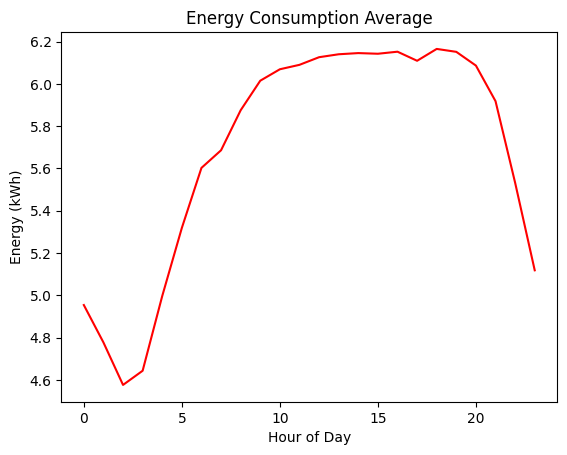

In [13]:

plt.plot(energy_consumption_hourly_avg['Hour'], energy_consumption_hourly_avg['Total Energy(kWh)'], c='r')

plt.xlabel('Hour of Day')
plt.ylabel('Energy (kWh)')
plt.title('Energy Consumption Average')
plt.show()

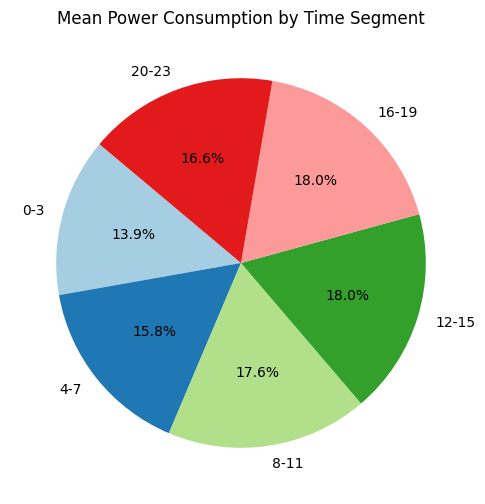

In [14]:
bins = [-1, 3, 7, 11, 15, 19, 23]
labels = ['0-3', '4-7', '8-11', '12-15', '16-19', '20-23']
energy_consumption_hourly_avg['Time Segment'] = pd.cut(energy_consumption_hourly_avg['Hour'], bins=bins, labels=labels, right=True)

# Calculate mean power consumption for each segment
segment_avg = energy_consumption_hourly_avg.groupby('Time Segment')['Total Energy(kWh)'].mean()

# Plot pie chart
plt.figure(figsize=(10, 6))
plt.pie(segment_avg, labels=segment_avg.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(segment_avg))))
plt.title('Mean Power Consumption by Time Segment')
plt.show()

In [15]:
total_energy_used_per_day = energy_consumption_hourly_avg['Total Energy(kWh)'].sum()

print(f'The mean amount of electricity used per day is {total_energy_used_per_day:.2f} KWh')

The mean amount of electricity used per day is 136.39 KWh


In [16]:
energy_produced_hourly_avg = sp_df.groupby('Hour')['Energy Output(kWh)'].mean().reset_index()

In [17]:
total_energy_produced_per_day = energy_produced_hourly_avg['Energy Output(kWh)'].sum()

print(f'The mean amount of electricity produced by solar per day is {total_energy_produced_per_day:.2f} KWh')

The mean amount of electricity produced by solar per day is 68.59 KWh


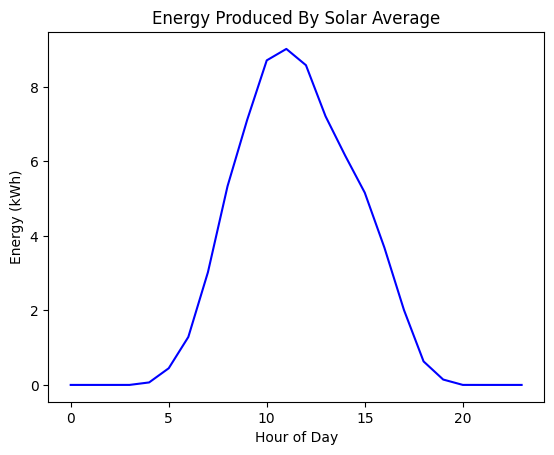

In [18]:

plt.plot(energy_produced_hourly_avg['Hour'], energy_produced_hourly_avg['Energy Output(kWh)'], c='b')

plt.xlabel('Hour of Day')
plt.ylabel('Energy (kWh)')
plt.title('Energy Produced By Solar Average')
plt.show()

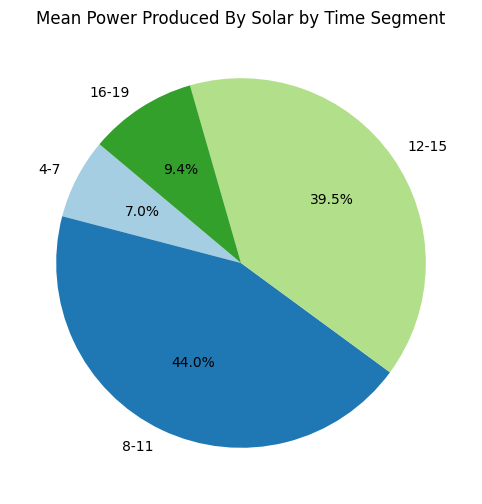

In [45]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming `energy_produced_hourly_avg` is already defined
bins = [-1, 3, 7, 11, 15, 19, 23]
labels = ['0-3', '4-7', '8-11', '12-15', '16-19', '20-23']
energy_produced_hourly_avg['Time Segment'] = pd.cut(energy_produced_hourly_avg['Hour'], bins=bins, labels=labels, right=True)

# Calculate mean power consumption for each segment
segment_avg = energy_produced_hourly_avg.groupby('Time Segment')['Energy Output(kWh)'].mean()

# Filter out segments with near-zero values
filtered_segment_avg = segment_avg[(segment_avg > 0.001)]

# Plot pie chart for the filtered segments
plt.figure(figsize=(10, 6))
plt.pie(filtered_segment_avg, labels=filtered_segment_avg.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(filtered_segment_avg))))
plt.title('Mean Power Produced By Solar by Time Segment')
plt.show()


# We remove 20 t0 3 because the sunrise differ in occurence at difference site  but earlier it can appear is 4:30 

In [43]:
si_df

,Site Name,diesel power(kW),battery capacity (Ah),rated voltage（V）,battery charge coefficient,battery discharge coefficient,init SOC,DOD,grid power(kW),grid outage plan,Battery Capacity (kWh),Effective Battery Capacity (kWh),Available Energy (kWh),Total Power (kW)
0,site1,18.0,300,54,0.35,1.2,0.2,0.15,8,[false false false false false false false fal...,16.20,6.8040,5.44320,26.0
1,site2,17.6,760,54,0.35,1.2,0.2,0.15,14,[false false false false false false false fal...,41.04,17.2368,13.78944,31.6
2,site3,12.8,760,54,0.35,1.2,0.2,0.15,10,[false false false false false false false fal...,41.04,17.2368,13.78944,22.8
3,site4,17.6,760,54,0.35,1.2,0.2,0.15,14,[true true true true true true true true true ...,41.04,17.2368,13.78944,31.6
4,site5,17.6,380,54,0.35,1.2,0.2,0.15,12,[false false false false false true true true ...,20.52,8.6184,6.89472,29.6
5,site6,17.6,760,54,0.35,1.2,0.2,0.15,8,[false false false false false false false fal...,41.04,17.2368,13.78944,25.6
6,site7,18.0,380,54,0.35,1.2,0.2,0.15,8,[false false false false false false false fal...,20.52,8.6184,6.89472,26.0
7,site8,10.8,400,54,0.35,1.2,0.2,0.15,12,[false false false false false false false fal...,21.60,9.0720,7.25760,22.8
8,site9,12.8,400,54,0.35,1.2,0.2,0.15,8,[true true true true true true true true true ...,21.60,9.0720,7.25760,20.8
9,site10,17.6,380,54,0.35,1.2,0.2,0.15,10,[false false false false false true true true ...,20.52,8.6184,6.89472,27.6


In [36]:


# Calculate battery capacity in kWh
si_df['Battery Capacity (kWh)'] = (si_df['battery capacity (Ah)'] * si_df['rated voltage（V）']) / 1000

# Calculate effective battery capacity
si_df['Effective Battery Capacity (kWh)'] = (si_df['Battery Capacity (kWh)'] *
                                          si_df['battery charge coefficient'] *
                                          si_df['battery discharge coefficient'])

# Calculate available energy
si_df['Available Energy (kWh)'] = si_df['Effective Battery Capacity (kWh)'] * (1 - si_df['init SOC'])

# Calculate total power
si_df['Total Power (kW)'] = si_df['diesel power(kW)'] + si_df['grid power(kW)']

# Analyze grid outage plan
# si_df['Grid Outage Count'] = si_df['grid outage plan'].apply(lambda x: sum(x))

print(si_df[['Site Name', 'Battery Capacity (kWh)', 'Effective Battery Capacity (kWh)', 
          'Available Energy (kWh)', 'Total Power (kW)']])

  Site Name  Battery Capacity (kWh)  Effective Battery Capacity (kWh)  \
0     site1                   16.20                            6.8040   
1     site2                   41.04                           17.2368   
2     site3                   41.04                           17.2368   
3     site4                   41.04                           17.2368   
4     site5                   20.52                            8.6184   
5     site6                   41.04                           17.2368   
6     site7                   20.52                            8.6184   
7     site8                   21.60                            9.0720   
8     site9                   21.60                            9.0720   
9    site10                   20.52                            8.6184   

   Available Energy (kWh)  Total Power (kW)  
0                 5.44320              26.0  
1                13.78944              31.6  
2                13.78944              22.8  
3           

In [69]:
sp_df

,Site Name,Day,Hour,Solar Zenith Angle,Clearsky DHI,Clearsky DNI,Clearsky GHI,Relative Humidity,DHI,DNI,GHI,Energy Output(kWh)
0,site1,1,0,138.12,0.00,0.00,0.00,59.05,0.00,0.0,0.0,0.00
1,site1,1,1,125.23,0.00,0.00,0.00,62.04,0.00,0.0,0.0,0.00
2,site1,1,2,116.75,0.00,0.00,0.00,65.29,0.00,0.0,0.0,0.00
3,site1,1,3,97.86,0.00,0.00,0.00,63.05,0.00,0.0,0.0,0.00
4,site1,1,4,85.22,30.97,204.94,48.05,57.81,32.22,0.0,33.7,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
14395,site9,60,19,145.79,0.00,0.00,0.00,64.04,0.00,0.0,0.0,0.16
14396,site9,60,20,151.97,0.00,0.00,0.00,72.03,0.00,0.0,0.0,0.00
14397,site9,60,21,172.55,0.00,0.00,0.00,70.42,0.00,0.0,0.0,0.00
14398,site9,60,22,166.77,0.00,0.00,0.00,75.79,0.00,0.0,0.0,0.00
